# Método de reducción de características

In [1100]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [1101]:
# Cargamos las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [1102]:
# Cargamos los datos
agp_df = pd.read_csv("../data/tidy_agricultura_ganaderia_pesca.csv", parse_dates=['ANO'])
imss_df = pd.read_csv("../data/tidy_imss1.csv", parse_dates=['fecha'])

In [1103]:
# Exploramos el dataframe para verificar que todo se encuentra en orden
agp_df.head()

,ANO,SECTOR,CVE_DDR,CVE_MUN,ESPECIE_CULTIVO,TIPO,PRODTON,VALPROD
0,2018-01-01,Agricultura,146,52,Rye grass en verde,Plantas forrajeras,0.0,0.00
1,2018-01-01,Agricultura,146,52,Sorgo forrajero en verde,Plantas forrajeras,23275.2,19551.17
2,2018-01-01,Agricultura,146,52,Trigo forrajero verde,Plantas forrajeras,0.0,0.00
3,2018-01-01,Agricultura,146,69,Litchi,Frutales,0.0,0.00
4,2018-01-01,Agricultura,146,69,Avena forrajera en verde,Plantas forrajeras,56.8,49.42


## 1. Datos de agricultura, ganadería y pesca (agp_df)

La finalidad de esta sección es llevar a cabo una exploración detallada del dataframe recién generado, que abarca la información de los tres sectores principales: agricultura, ganadería y pesca. El propósito central de esta exploración es evaluar la viabilidad y pertinencia de aplicar el Análisis de Componentes Principales (PCA) en este conjunto de datos.

Para lograr este objetivo, se realizará un análisis de las características y estructura del dataframe. Se prestará especial atención a aspectos como la identificación de cualquier patrón discernible.

Además, se considerará la naturaleza de las variables incluidas, con énfasis en la posible presencia de variables categóricas o datos temporales, dado que estos elementos pueden influir en la eficacia y adecuación de la aplicación de PCA.

Este análisis exploratorio proporcionará una comprensión sólida de la composición y complejidad del conjunto de datos. Posteriormente, se examinará la idoneidad de la utilización de PCA como una herramienta para reducir la dimensionalidad del conjunto de datos, preservando al mismo tiempo la variabilidad esencial.

In [1104]:
# Vemos que las características estén en tipo de dato adecuado
agp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8734 entries, 0 to 8733
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ANO              8734 non-null   datetime64[ns]
 1   SECTOR           8734 non-null   object        
 2   CVE_DDR          8734 non-null   int64         
 3   CVE_MUN          8734 non-null   int64         
 4   ESPECIE_CULTIVO  8734 non-null   object        
 5   TIPO             8734 non-null   object        
 6   PRODTON          8734 non-null   float64       
 7   VALPROD          8734 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 546.0+ KB


Al analizar el dataframe (**agp_df**) que abarca información de agricultura, ganadería y pesca, se identificaron solo tres variables numéricas: ANO, PRODTON y VALPROD. Además, se observó que variables como CVE_DDR y CVE_MUN son categóricas nominales recodificadas, al igual que otras variables en el conjunto.

Dada la predominancia de variables categóricas nominales y la limitada presencia de características numéricas, se concluye que en este caso la utilización de un método de reducción de características, como PCA, no es esencial. La información del dataframe puede comprenderse de manera efectiva sin sacrificar relevancia, ya que las técnicas de reducción de dimensionalidad son más útiles en conjuntos de datos con numerosas características numéricas.

## 2. Datos del IMSS (imss_df)

El objetivo es evaluar la viabilidad de aplicar PCA al dataframe que contiene información sobre empleos generados en los sectores de agricultura, ganadería y pesca según el IMSS. La exploración busca determinar si PCA es apropiado para reducir la dimensionalidad de los datos, simplificando su análisis sin perder información crucial.

In [1105]:
# Exploramos el dataframe de imss
imss_df.head()

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion
0,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
1,W2,4,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
2,W7,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 6 y hasta 7 veces el salario mínimo
3,W2,3,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
4,W14,1,0,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 13 y hasta 14 veces el salario mínimo


In [1106]:
# Verificamos tipos de variables
imss_df = imss_df.drop(columns=['no_trabajadores'])
imss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629639 entries, 0 to 629638
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   rango_salarial              629639 non-null  object        
 1   asegurados                  629639 non-null  int64         
 2   año                         629639 non-null  int64         
 3   mes                         629639 non-null  int64         
 4   fecha                       629639 non-null  datetime64[ns]
 5   municipio                   629639 non-null  object        
 6   sector_economico_1          629639 non-null  object        
 7   sector_economico_2          629639 non-null  object        
 8   sector_economico_4          629639 non-null  object        
 9   tamaño_patronal             629639 non-null  object        
 10  sexo                        629639 non-null  object        
 11  rango_edad                  629639 non-

### 2.1 Exploración y recodificación de variables categóricas ordinales

El objetivo es evaluar la viabilidad de aplicar PCA al dataframe que contiene información sobre empleos generados en los sectores de agricultura, ganadería y pesca según el IMSS. La exploración busca determinar si PCA es apropiado para reducir la dimensionalidad de los datos, simplificando su análisis sin perder información crucial.

In [1107]:
# Abrimos los catálogos que estaremos utilizando para el análisis y recodificación
cat_edad_df = pd.read_csv("../data/imss_Rango_edad_clave.csv")
cat_salario_df = pd.read_csv("../data/imss_Rango_salario_clave.csv")
cat_patronal_df = pd.read_csv("../data/imss_Tamaño_de_registro_patronal_clave.csv")

####  2.1.1 Rango de salarial

In [1108]:
# Exploramos los valores de rango de salarial en el dataframe
imss_df["rango_salarial"].value_counts(dropna=False)

rango_salarial
W2           249761
W3           125460
W4            77981
W5            50095
W6            32323
W7            22077
W8            16027
W9            10937
W10            8047
W11            5795
W12            5102
W14            4759
W13            4144
W16            3977
W18            2609
W15            2285
W21            1665
W17            1359
W23            1259
W1              944
W20             938
W19             752
W22             683
No aplica       660
Name: count, dtype: int64

In [1109]:
# Exploramos el catálogo de valores de rango salarial
cat_salario_df

,Clave,Rango_salarial,Descripcion
0,1,W1,Hasta 1 vez el salario mínimo
1,2,W2,mayor a 1 y hasta 2 veces el salario mínimo
2,3,W3,mayor a 2 y hasta 3 veces el salario mínimo
3,4,W4,mayor a 3 y hasta 4 veces el salario mínimo
4,5,W5,mayor a 4 y hasta 5 veces el salario mínimo
5,6,W6,mayor a 5 y hasta 6 veces el salario mínimo
6,7,W7,mayor a 6 y hasta 7 veces el salario mínimo
7,8,W8,mayor a 7 y hasta 8 veces el salario mínimo
8,9,W9,mayor a 8 y hasta 9 veces el salario mínimo
9,10,W10,mayor a 9 y hasta 10 veces el salario mínimo


Como se observa, estas categorías mantienen un orden, a excepción de la última que corresponde a "no aplica". Procederemos a recodificar de acuerdo con las claves asignadas en los catálogos. Además, llevaremos a cabo la imputación de datos faltantes o "no aplica" asignando el valor de la mediana de los datos que sí aplican. Se añadirá una columna indicadora para distinguir los valores imputados.

In [1110]:
# Fusionaremos el DataFrame 'imss_df' con el DataFrame 'cat_salario_df' para obtener los valores recodificados,
# es decir, la columna con la clave correspondiente.
# Dicho left join se realiza utilizando la columna 'rango_salarial' en 'imss_df' y 'Rango_salarial' en 'cat_salario_df'
imss_df = pd.merge(imss_df, cat_salario_df, left_on=['rango_salarial'], right_on=['Rango_salarial'], how='left')

# Eliminar las columnas redundantes después de la fusión
# Las columnas eliminadas son 'Rango_salarial', 'Descripcion' y 'rango_salarial_descripcion'
imss_df = imss_df.drop(columns=["Rango_salarial", "Descripcion", "rango_salarial_descripcion"])

# Renombrar la columna 'Clave' a 'clave_rango_salarial'
imss_df.rename(columns={'Clave': 'clave_rango_salarial'}, inplace=True)

# Mostrar las primeras filas del DataFrame resultante
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,clave_rango_salarial
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,2.0
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,2.0
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,7.0
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,2.0
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,14.0


In [1111]:
# Crear una lista booleana que indica si 'clave_rango_salarial' es NaN (no aplica)
no_aplica = imss_df['clave_rango_salarial'].isna()

# Agregar una nueva columna 'no_aplica_rango_salarial' e inicializarla con ceros
imss_df['no_aplica_rango_salarial'] = 0

# Asignar 1 a 'no_aplica_rango_salarial' en las filas donde 'clave_rango_salarial' es NaN
imss_df.loc[no_aplica, 'no_aplica_rango_salarial'] = 1

# Imputar el valor de la mediana de 'clave_rango_salarial' en las filas donde 'clave_rango_salarial' es NaN
imss_df.loc[no_aplica, 'clave_rango_salarial'] = int(imss_df.loc[~no_aplica,"clave_rango_salarial"].median())

# Mostrar las primeras filas del DataFrame resultante
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,clave_rango_salarial,no_aplica_rango_salarial
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,2.0,0
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,2.0,0
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,7.0,0
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,2.0,0
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,14.0,0


In [1112]:
# Convertir la columna 'clave_rango_salarial' a tipo de dato entero
imss_df['clave_rango_salarial'] = imss_df['clave_rango_salarial'].astype(int)

# Contar la frecuencia de los valores únicos en la columna 'clave_rango_salarial'
# Solo se realiza para las filas donde 'no_aplica' es verdadero
imss_df.loc[no_aplica, 'clave_rango_salarial'].value_counts()

clave_rango_salarial
3    660
Name: count, dtype: int64

####  2.1.2 Rango de edad

Se aplica un tratamiento similar a la variable 'rango_edad' dado que se trata de una variable cualitativa ordinal. Esto implica la identificación y manejo de valores no aplicables, la creación de columnas indicadoras, y la imputación de valores utilizando la mediana de los datos correspondientes.

In [1113]:
# Exploramos los valores de rango de edad en el dataframe
imss_df["rango_edad"].value_counts(dropna=False)

rango_edad
Mayor o igual a 45 y menor a 50 años de edad    74851
Mayor o igual a 40 y menor a 45 años de edad    74457
Mayor o igual a 35 y menor a 40 años de edad    71671
Mayor o igual a 30 y menor a 35 años de edad    70302
Mayor o igual a 50 y menor a 55 años de edad    67912
Mayor o igual a 25 y menor a 30 años de edad    65546
Mayor o igual a 55 y menor a 60 años de edad    63731
Mayor o igual a 20 y menor a 25 años de edad    43175
Mayor o igual a 60 y menor a 65 años de edad    41032
Mayor o igual a 65 y menor a 70 años de edad    20758
Mayor o igual a 15 y menor a 20 años de edad    17646
Mayor o igual a 70 y menor a 75 años de edad    10993
75 o más años de edad                            7500
Menores de 15 años de edad                         65
Name: count, dtype: int64

In [1114]:
# Exploramos los valores de rango de edad en el catálogo
cat_edad_df

,Clave,Rango_edad,Descripcion
0,1,E1,Menores de 15 años de edad
1,2,E2,Mayor o igual a 15 y menor a 20 años de edad
2,3,E3,Mayor o igual a 20 y menor a 25 años de edad
3,4,E4,Mayor o igual a 25 y menor a 30 años de edad
4,5,E5,Mayor o igual a 30 y menor a 35 años de edad
5,6,E6,Mayor o igual a 35 y menor a 40 años de edad
6,7,E7,Mayor o igual a 40 y menor a 45 años de edad
7,8,E8,Mayor o igual a 45 y menor a 50 años de edad
8,9,E9,Mayor o igual a 50 y menor a 55 años de edad
9,10,E10,Mayor o igual a 55 y menor a 60 años de edad


In [1115]:
# Para recodificar rango de edad de acuerdo a la clave ordenada realizaremos un join
# El left join se realiza utilizando la columna 'rango_edad' en 'imss_df' y 'Descripcion' en 'cat_edad_df'
imss_df = pd.merge(imss_df, cat_edad_df, left_on=['rango_edad'], right_on=['Descripcion'], how='left')

# Eliminamos las columnas redundantes después del join
# Las columnas eliminadas son 'Rango_edad', 'Descripcion' y 'rango_edad'
imss_df = imss_df.drop(columns=["Rango_edad", "Descripcion", "rango_edad"])

# Renombramos la columna 'Clave' a 'clave_rango_edad'
imss_df.rename(columns={'Clave': 'clave_rango_edad'}, inplace=True)

# Mostramos las primeras filas del DataFrame resultante
imss_df.head()


,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,clave_rango_salarial,no_aplica_rango_salarial,clave_rango_edad
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,2,0,10
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,2,0,11
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,7,0,11
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,2,0,12
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,14,0,13


In [1116]:
# Contamos la frecuencia de los valores únicos en la columna 'clave_rango_edad'
# dropna=False incluye también los valores NaN en el conteo
imss_df['clave_rango_edad'].value_counts(dropna=False)

clave_rango_edad
8     74851
7     74457
6     71671
5     70302
9     67912
4     65546
10    63731
3     43175
11    41032
12    20758
2     17646
13    10993
14     7500
1        65
Name: count, dtype: int64

####  2.1.3 Tamaño patronal

Se replicará el procedimiento previamente realizado para la variable 'rango_edad' en la variable 'tamaño_patronal'.

In [1117]:
# Contamos la frecuencia de los valores únicos en la columna 'tamaño_patronal'
# dropna=False incluye también los valores NaN en el conteo
imss_df['tamaño_patronal'].value_counts(dropna=False)


tamaño_patronal
con 51 y hasta 250 puestos de trabajo       180316
con 6 y hasta 50 puestos de trabajo         175556
con 2 y hasta 5 puestos de trabajo           84921
con 501 y hasta 1,000 puestos de trabajo     67645
con 251 y hasta 500 puestos de trabajo       64631
Con un puesto de trabajo                     34370
con más de 1,000 puestos de trabajo          21383
No aplica                                      817
Name: count, dtype: int64

In [1118]:
# Exploramos el catálogo de tamaño patronal
cat_patronal_df

,Clave,Tamano_patron,Descripcion
0,1,S1,Con un puesto de trabajo
1,2,S2,con 2 y hasta 5 puestos de trabajo
2,3,S3,con 6 y hasta 50 puestos de trabajo
3,4,S4,con 51 y hasta 250 puestos de trabajo
4,5,S5,con 251 y hasta 500 puestos de trabajo
5,6,S6,"con 501 y hasta 1,000 puestos de trabajo"
6,7,S7,"con más de 1,000 puestos de trabajo"
7,8,NaN,No aplica


In [1119]:
# Para recodificar rango de edad de acuerdo a la clave ordenada realizaremos un join
# El join se realiza utilizando la columna 'tamaño_patronal' en 'imss_df' y 'Descripcion' en 'cat_patronal_df'
imss_df = pd.merge(imss_df, cat_patronal_df, left_on=['tamaño_patronal'], right_on=['Descripcion'], how='left')

# Eliminamos las columnas redundantes después del join
# Las columnas eliminadas son 'Tamano_patron', 'Descripcion' y 'tamaño_patronal'
imss_df = imss_df.drop(columns=["Tamano_patron", "Descripcion", "tamaño_patronal"])

# Renombrar la columna 'Clave' a 'clave_tamaño_patronal'
imss_df.rename(columns={'Clave': 'clave_tamaño_patronal'}, inplace=True)

# Mostramos las primeras filas del DataFrame resultante
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,sexo,clave_rango_salarial,no_aplica_rango_salarial,clave_rango_edad,clave_tamaño_patronal
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,10,1
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,11,1
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,7,0,11,1
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,12,1
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,14,0,13,1


In [1120]:
# Contar la frecuencia de los valores únicos en la columna 'clave_tamaño_patronal'
imss_df["clave_tamaño_patronal"].value_counts()

clave_tamaño_patronal
4    180316
3    175556
2     84921
6     67645
5     64631
1     34370
7     21383
8       817
Name: count, dtype: int64

In [1121]:
# Creamos una Serie booleana que indica si 'clave_tamaño_patronal' es igual a 8
no_aplica = imss_df["clave_tamaño_patronal"] == 8

# Agregamos una nueva columna 'no_aplica_tamaño_patronal' e inicializamos con ceros
imss_df['no_aplica_tamaño_patronal'] = 0

# Asignamos 1 a 'no_aplica_tamaño_patronal' en las filas donde 'clave_tamaño_patronal' es igual a 8
imss_df.loc[no_aplica, 'no_aplica_tamaño_patronal'] = 1

# Imputamos el valor de la mediana de 'clave_tamaño_patronal' en las filas donde 'clave_tamaño_patronal' es igual a 8
# Utilizando los valores no nulos para el cálculo de la mediana
imss_df.loc[no_aplica, 'clave_tamaño_patronal'] = int(imss_df.loc[~no_aplica, "clave_tamaño_patronal"].median())

# Mostramos las primeras filas del DataFrame resultante
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,sexo,clave_rango_salarial,no_aplica_rango_salarial,clave_rango_edad,clave_tamaño_patronal,no_aplica_tamaño_patronal
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,10,1,0
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,11,1,0
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,7,0,11,1,0
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,12,1,0
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,14,0,13,1,0


In [1122]:
# Contar la frecuencia de los valores únicos en la columna 'clave_tamaño_patronal'
imss_df["clave_tamaño_patronal"].value_counts()

clave_tamaño_patronal
4    181133
3    175556
2     84921
6     67645
5     64631
1     34370
7     21383
Name: count, dtype: int64

In [1123]:
# Obtener información sobre el DataFrame 'imss_df'
imss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629639 entries, 0 to 629638
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   rango_salarial             629639 non-null  object        
 1   asegurados                 629639 non-null  int64         
 2   año                        629639 non-null  int64         
 3   mes                        629639 non-null  int64         
 4   fecha                      629639 non-null  datetime64[ns]
 5   municipio                  629639 non-null  object        
 6   sector_economico_1         629639 non-null  object        
 7   sector_economico_2         629639 non-null  object        
 8   sector_economico_4         629639 non-null  object        
 9   sexo                       629639 non-null  object        
 10  clave_rango_salarial       629639 non-null  int64         
 11  no_aplica_rango_salarial   629639 non-null  int64   

### 2.2  Análisis de Componentes Principales (PCA)

El *Análisis de Componentes Principales* (PCA) es una técnica estadística utilizada para simplificar la complejidad en conjuntos de datos, reduciendo su dimensionalidad mientras se mantiene la mayor cantidad posible de la variabilidad original. Su objetivo principal es identificar patrones subyacentes y relaciones entre variables, destacando las principales fuentes de variación.

**Objetivo de la Sección:**
En esta sección, se busca aplicar PCA a las variables numéricas y ordinales relacionadas con los trabajos generados por los sectores agropecuarios y pesqueros en el IMSS. El propósito es identificar patrones subyacentes en estos datos, permitiendo una comprensión más profunda de las relaciones entre variables y la variabilidad inherente en la generación de empleos en estos sectores. Este análisis contribuirá a la simplificación de la información y la identificación de características clave que caracterizan los patrones en el ámbito laboral de estos sectores.

In [1124]:
# Seleccionamos sólo las variables numéricas para incluirlas dentro del PCA
imss_numericas = imss_df.select_dtypes(include=['number'])

#### 2.2.1 Sin estandarizar los valores

In [1125]:
# Aplicar PCA
pca = PCA()
principal_components = pca.fit_transform(imss_numericas)

# Crear un DataFrame con los componentes principales
# Elige nombres de columnas que reflejen el número real de componentes principales
num_componentes = principal_components.shape[1]
column_names = [f'PC{i}' for i in range(1, num_componentes + 1)]
df_pca = pd.DataFrame(data=principal_components, columns=column_names)

# Mostrar el DataFrame después de PCA
print("DataFrame después de PCA:")
df_pca

DataFrame después de PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.769437,5.217661,-2.819083,2.984752,-2.864411,1.365670,0.001549,-0.006028
1,-1.786267,5.213831,-2.823487,3.981332,-2.836144,1.290095,0.001183,-0.006395
2,-4.920473,5.653783,2.037618,3.990438,-2.676669,1.862229,0.002469,-0.006254
3,-2.802488,5.212430,-2.853712,4.959753,-2.804669,1.200200,0.000791,-0.006756
4,-5.144580,6.251853,8.942806,6.072614,-2.410338,2.572207,0.003642,-0.006815
...,...,...,...,...,...,...,...,...
629634,-4.964085,-5.096960,4.919847,1.810921,1.831147,1.658225,-0.003603,-0.002069
629635,-4.743902,-5.510473,0.003296,-3.235562,1.539955,1.421010,-0.003132,-0.000359
629636,-4.733526,-5.600836,-0.988821,-2.251699,1.538252,1.222416,-0.003771,-0.000750
629637,-4.723149,-5.691199,-1.980938,-1.267835,1.536549,1.023822,-0.004409,-0.001141



Explained Variance Ratio:
[8.98313927e-01 3.52532796e-02 3.21084234e-02 2.29231867e-02
 5.93306300e-03 5.46122746e-03 3.81342677e-06 3.07916201e-06]


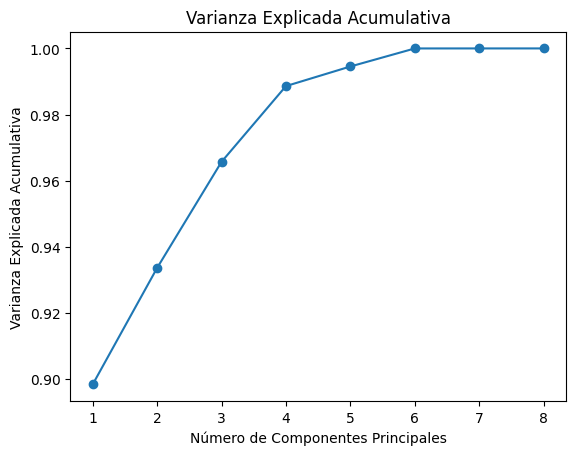

In [1126]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Graficar la varianza explicada acumulativa
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa')
plt.show()

La estandarización de variables antes de aplicar PCA reveló que las dos primeras componentes principales son capaces de explicar un impresionante 93% de la varianza en los datos. Este hallazgo sugiere que estas dos componentes capturan de manera efectiva la información esencial contenida en las variables originales, proporcionando una representación compacta pero informativa de la estructura subyacente de los sectores agropecuarios y pesqueros en el IMSS. La alta proporción de varianza explicada por estas componentes resalta su importancia en la caracterización de patrones y tendencias significativas en los datos. 

Procederemos entonces a explorar los resultados utilizando estas dos componentes principales para graficar en dos dimensiones.

#### 2.2.1 Graficación de resultados

DataFrame después de PCA (2D):
             PC1       PC2
0      -1.769437  5.217661
1      -1.786267  5.213831
2      -4.920473  5.653783
3      -2.802488  5.212430
4      -5.144580  6.251853
...          ...       ...
629634 -4.964085 -5.096960
629635 -4.743902 -5.510473
629636 -4.733526 -5.600836
629637 -4.723149 -5.691199
629638 -4.777562 -5.518133

[629639 rows x 2 columns]


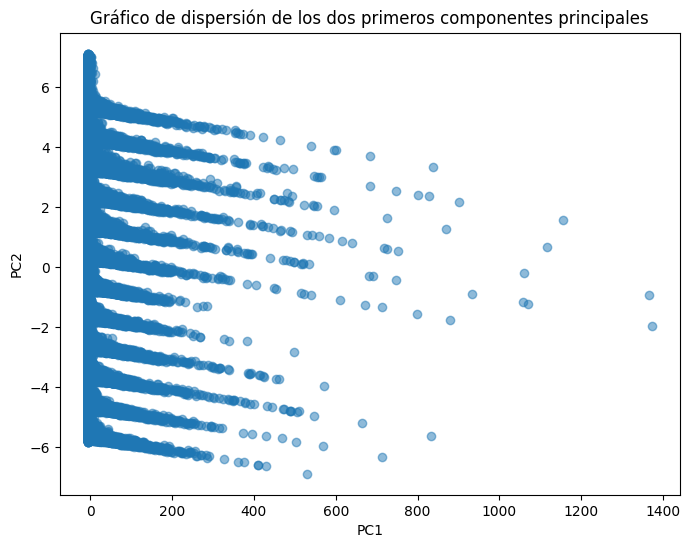

In [1127]:
# Mostrar el DataFrame después de PCA en 2D
print("DataFrame después de PCA (2D):")
print(df_pca[['PC1','PC2']])

# Graficar en 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Gráfico de dispersión de los dos primeros componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Se percibe una posible estructura o patrón en la visualización, y para una identificación más precisa, procederemos a colorear los puntos de acuerdo a los sectores y subsectores económicos. Esta estrategia nos permitirá discernir visualmente si hay agrupaciones distintivas asociadas con categorías específicas. La coloración según sectores y subsectores proporcionará insights adicionales sobre posibles relaciones y patrones específicos en los datos, facilitando una comprensión más profunda de la variabilidad en los sectores agropecuarios y pesqueros en el IMSS.

#### Exploración de Componentes Principales en el Sector 2

In [1128]:
# Hacemos un left join con los datos del IMSS para agregar las dos componentes principales
imss_df[["PC1", 'PC2']] = df_pca[['PC1','PC2']]
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,sexo,clave_rango_salarial,no_aplica_rango_salarial,clave_rango_edad,clave_tamaño_patronal,no_aplica_tamaño_patronal,PC1,PC2
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,10,1,0,-1.769437,5.217661
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,11,1,0,-1.786267,5.213831
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,7,0,11,1,0,-4.920473,5.653783
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,12,1,0,-2.802488,5.212430
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,14,0,13,1,0,-5.144580,6.251853


In [1129]:
# Exploramos los calores en el sector 2
imss_df['sector_economico_2'].value_counts()

sector_economico_2
Agricultura    339001
Ganadería      171628
Pesca          119010
Name: count, dtype: int64

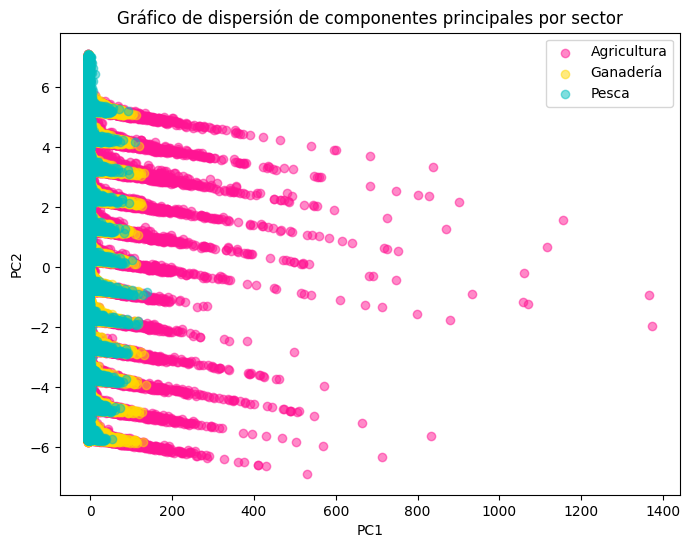

In [1130]:
# Definir colores para cada categoría en la columna "sector"
colores = {'Agricultura': 'deeppink', 'Ganadería': 'gold', 'Pesca': 'c'}

# Graficar en 2D con colores por categoría
plt.figure(figsize=(8, 6))
for categoria, color in colores.items():
    subset = imss_df[imss_df['sector_economico_2'] == categoria]
    plt.scatter(subset['PC1'], subset['PC2'], label=categoria, color=color, alpha=0.5)

plt.title('Gráfico de dispersión de componentes principales por sector')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

La visualización de las componentes principales revela que el sector de Agricultura exhibe una notable variabilidad en la dirección de la Componente Principal 1. Este hallazgo sugiere una diversidad significativa dentro de este sector, indicando posiblemente la coexistencia de múltiples patrones o subgrupos. La Componente Principal 1, por lo tanto, emerge como una dimensión clave para entender las diferencias y particularidades que caracterizan a las unidades dentro del ámbito agrícola. 

#### Exploración de Componentes Principales en el Sector 4

In [1131]:
# Exploramos las categorías dentro del sector 4
imss_df['sector_economico_4'].value_counts()

sector_economico_4
Agricultura                                                339001
Cría y explotación de ganado y otras clases de animales    171628
Acuicultura                                                 61491
Pesca de altura y costera                                   50297
Pesca en aguas interiores                                    4027
Trabajos de buceo                                            3195
Name: count, dtype: int64

/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



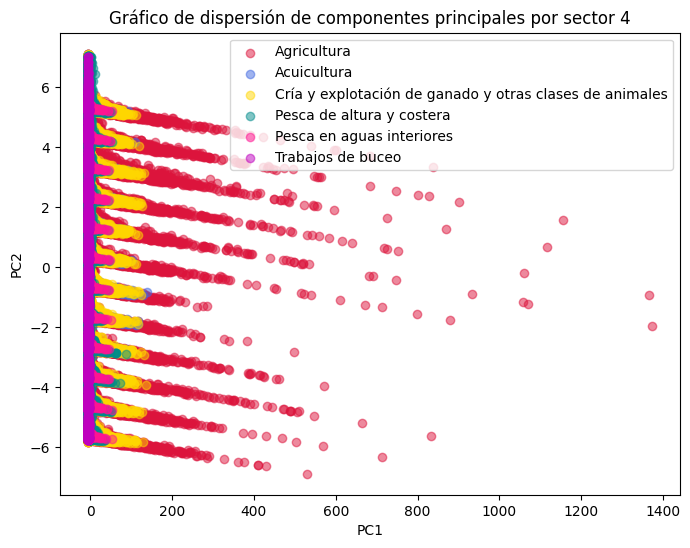

In [1132]:
# Definir colores para cada categoría en la columna "sector"
colores = {'Agricultura': 'crimson', 'Acuicultura': 'royalblue', 'Cría y explotación de ganado y otras clases de animales': 'gold', 'Pesca de altura y costera': 'darkcyan', 'Pesca en aguas interiores': 'deeppink', 'Trabajos de buceo': 'm'}

# Graficar en 2D con colores por categoría
plt.figure(figsize=(8, 6))
for categoria, color in colores.items():
    subset = imss_df[imss_df['sector_economico_4'] == categoria]
    plt.scatter(subset['PC1'], subset['PC2'], label=categoria, color=color, alpha=0.5)

plt.title('Gráfico de dispersión de componentes principales por sector 4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Una vez más, al profundizar en el análisis por subsectores, se confirma que Agricultura mantiene su posición como el subsector con la mayor variabilidad en la dirección del Componente Principal 1. Este patrón persistente resalta la diversidad inherente a la Agricultura y subraya la presencia de múltiples factores o dinámicas que contribuyen a su complejidad. 

#### 2.2.2 Estandarizando los datos

In [1133]:
# Inicializa el objeto StandardScaler
scaler = StandardScaler()

# Estandariza las columnas numéricas
imss_numericas_stand = scaler.fit_transform(imss_numericas)

In [1134]:
# Aplicar PCA
pca1 = PCA()
principal_components1 = pca1.fit_transform(imss_numericas_stand)

# Crear un DataFrame con los componentes principales
# Elige nombres de columnas que reflejen el número real de componentes principales
num_componentes = principal_components1.shape[1]
column_names = [f'PC{i}' for i in range(1, num_componentes + 1)]
df_pca = pd.DataFrame(data=principal_components1, columns=column_names)

# Mostrar el DataFrame después de PCA
print("DataFrame después de PCA:")
df_pca

DataFrame después de PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.497356,-0.300359,-1.407359,1.021402,-0.675589,1.839296,-0.519331,0.289184
1,-1.666799,-0.378227,-1.388682,1.104576,-0.676895,1.936126,-0.245574,0.247043
2,-1.362429,-1.514493,-1.084233,1.235143,-0.578055,1.557321,-0.181080,1.060941
3,-1.860716,-0.483614,-1.357612,1.189479,-0.691001,2.013712,0.006318,0.177191
4,-1.172412,-3.145424,-0.672703,1.577020,-0.388528,1.301474,0.548567,2.232501
...,...,...,...,...,...,...,...,...
629634,-0.788717,-0.633289,1.194297,-0.928601,0.209328,-1.236342,1.004387,1.203985
629635,-0.319288,0.809762,0.833645,-1.469848,0.078613,-1.399415,-0.494495,0.517660
629636,-0.564289,0.942635,0.798868,-1.411750,0.049860,-1.238370,-0.246756,0.296112
629637,-0.809290,1.075509,0.764091,-1.353652,0.021106,-1.077325,0.000983,0.074565



Explained Variance Ratio:
[0.16177906 0.15192414 0.12901159 0.12481655 0.12295033 0.11624398
 0.11083366 0.08244069]


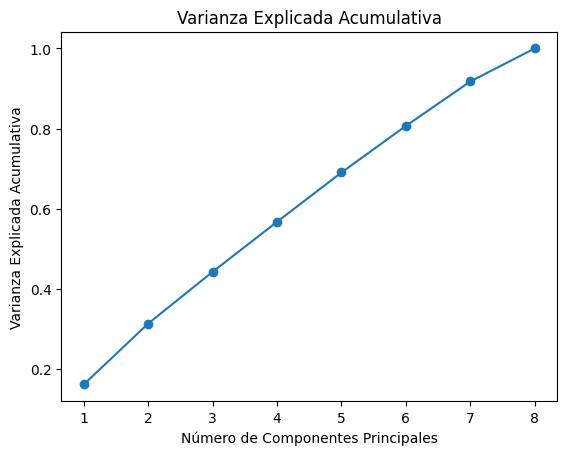

In [1135]:
# Explained variance ratio
explained_variance_ratio = pca1.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Graficar la varianza explicada acumulativa
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa')
plt.show()

Vemos que al estandarizar los valores, con dos componentes principales explicamos menos del 40% de la varianza. Lo cual resulta mucho menor que los valores que obteniamos en el caso anterior. Exploraremos qué se obtiene.

#### Exploración de Componentes Principales en el Sector 2

In [1136]:
# Hacemos un left join con los datos del IMSS para agregar las dos componentes principales
imss_df[["PC1", 'PC2']] = df_pca[['PC1','PC2']]
imss_df.head()

,rango_salarial,asegurados,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,sexo,clave_rango_salarial,no_aplica_rango_salarial,clave_rango_edad,clave_tamaño_patronal,no_aplica_tamaño_patronal,PC1,PC2
0,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,10,1,0,-1.497356,-0.300359
1,W2,4,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,11,1,0,-1.666799,-0.378227
2,W7,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,7,0,11,1,0,-1.362429,-1.514493
3,W2,3,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,2,0,12,1,0,-1.860716,-0.483614
4,W14,1,2018,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Hombre,14,0,13,1,0,-1.172412,-3.145424


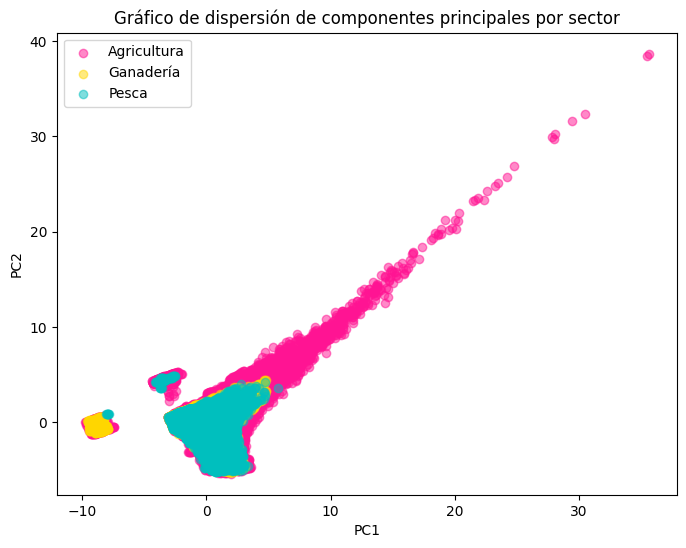

In [1138]:
# Definir colores para cada categoría en la columna "sector"
colores = {'Agricultura': 'deeppink', 'Ganadería': 'gold', 'Pesca': 'c'}

# Graficar en 2D con colores por categoría
plt.figure(figsize=(8, 6))
for categoria, color in colores.items():
    subset = imss_df[imss_df['sector_economico_2'] == categoria]
    plt.scatter(subset['PC1'], subset['PC2'], label=categoria, color=color, alpha=0.5)

plt.title('Gráfico de dispersión de componentes principales por sector')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### Exploración de Componentes Principales en el Sector 4

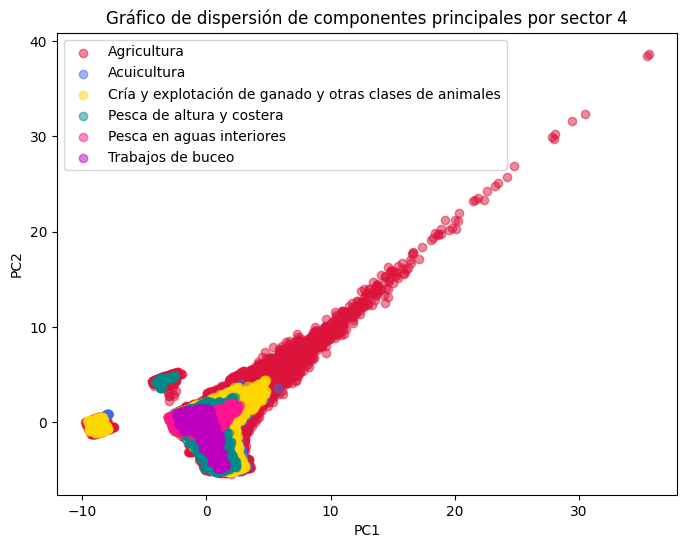

In [1139]:
# Definir colores para cada categoría en la columna "sector"
colores = {'Agricultura': 'crimson', 'Acuicultura': 'royalblue', 'Cría y explotación de ganado y otras clases de animales': 'gold', 'Pesca de altura y costera': 'darkcyan', 'Pesca en aguas interiores': 'deeppink', 'Trabajos de buceo': 'm'}

# Graficar en 2D con colores por categoría
plt.figure(figsize=(8, 6))
for categoria, color in colores.items():
    subset = imss_df[imss_df['sector_economico_4'] == categoria]
    plt.scatter(subset['PC1'], subset['PC2'], label=categoria, color=color, alpha=0.5)

plt.title('Gráfico de dispersión de componentes principales por sector 4')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Al visualizar los datos mediante PCA, observamos patrones interesantes en la distribución de empleos por sector. En particular, notamos que el sector "Agricultura" muestra una mayor variabilidad en comparación con otros sectores. Esta variabilidad puede sugerir una diversidad significativa en los niveles salariales y tipos de empleo dentro de la categoría de agricultura.

Posibles Razones para la Variabilidad en Agricultura:

Clases Desbalanceadas: Es plausible que la variabilidad en el sector "Agricultura" esté relacionada con clases desbalanceadas, donde la categoría abarca una amplia gama de empleos con diferentes niveles de salario, edad, etc.

Diversidad Ocupacional: La diversidad en el tipo de empleos en agricultura, que van desde roles más técnicos hasta trabajadores agrícolas, podría contribuir a la variabilidad observada.